In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn.preprocessing import StandardScaler  # It is important to scale the date


#Unsupervised Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

#Logistic Regression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#Neural Network
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy.random as r # We will randomly initialize our weights
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import tensorflow as tf
from keras import optimizers
from keras import losses
import keras

#SVM
from sklearn import svm
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score

(11000, 901)
(11000,) (11000, 900)


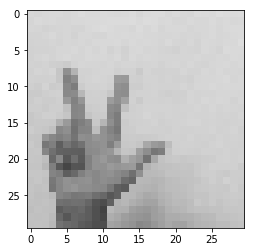

In [40]:
data = pd.read_csv('ASL_data_Numeric_labels_with_empty_backg_30x30_1000samp_number_only.csv')
data = data.dropna()
print(data.shape)
#Convert dataframe data into a numpy array
df = np.array(data.values)
#Select first column for the labels/y
y = df[:,0]
#Select remaining columns as x data(pixel array)
x = df[:,1:]
print(y.shape, x.shape)

sample1 = np.uint8(x[0,:].reshape(30,30))

img = Image.fromarray(sample1)
plt.imshow(img)

# Unsupervised Analysis

In [39]:
#Find accuracy, rsq and MSE
def statistics(yhat,y):
    #mean squared error
    mse = np.mean((y-yhat)**2)
    count = 0
    for i in range(len(yhat)):
        if(yhat[i] == y[i]):
            count += 1
    accuracy = count/len(yhat)
    #Calculate coefficient of determination
    rss = np.sum((y-yhat)**2)
    tss = np.sum((y-np.mean(y))**2)
    rsq = 1-(rss/tss)
    return mse,accuracy,rsq

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11000, 2)
Confusion matrix
 [[ 455   21    0   45  144    0   65  127   98   24   21]
 [ 433    0    0   14  303    0   49   44   46   79   32]
 [  99    8   60   44  302    0  269   65   94   38   21]
 [   0   75  216   40    0    4  246   34  371    6    8]
 [   0  433  258   49    0   31   74   53   69   26    7]
 [   0   66  152   47   83    0  398   12   81   72   89]
 [  75   45   76   29  278    0  393    0   71   33    0]
 [   0  101  516   65    0    0   56    0    7  251    4]
 [   2   39   17    0  163    0  624    0   25  130    0]
 [   0   87  401   54    0    0  161    0   95   57  145]
 [   0    0    0    0    0 1000    0    0    0    0    0]]
MSE 15.211636363636364
Accuracy 0.09363636363636364
R^2 -0.5211636363636363


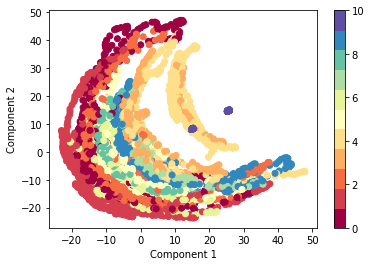

In [40]:
# Unsupervised Analysis-K Means Clustering
X_scale = StandardScaler()
x_unsup = X_scale.fit_transform(x)

#Visualize data in 2 dimensions: preserving maximum data variance
project = PCA(2).fit_transform(x_unsup)  # project from 900 to 2 dimensions
print(project.shape)

plt.scatter(project[:, 0], project[:, 1],
            c=y,cmap=plt.cm.get_cmap('Spectral', 11))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

#Without PCA transformation
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(x_unsup)
#predicted labels for each point
yhat = clusters.labels_
mse, accuracy,rsq = statistics(yhat,y) #found below, calculates MSE, R^2 and accuracy
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

900
82


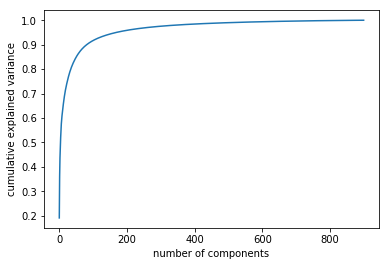

In [41]:
#Explained variance by number of components
pca = PCA().fit(x_unsup)
print(pca.n_components_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA(0.90).fit(x_unsup) 
print(pca.n_components_) #90% of variance explained by 82 components

Confusion matrix
 [[383  57   0 103  17   0  16  91 166 150  17]
 [294 102   0  65   0   0  22  20 280 217   0]
 [202  91   0  32  48   0  32  57 260 261  17]
 [  0  64   3  82 229  26  45  26   0   0 525]
 [  0 126   3  41 175 303  75 118   0   0 159]
 [270 172   0  22 296   0  46   0  13  80 101]
 [275  84   0   8 130   0  11   0 139 280  73]
 [  0 428   0  20 362   0  71   0   0   0 119]
 [343 123   0  30 153   0   0   0   4 326  21]
 [  1 205   0  74 288   0 193   0   0   0 239]
 [  0   0 500   0   0 500   0   0   0   0   0]]
MSE 24.92309090909091
Accuracy 0.06881818181818182
R^2 -1.492309090909091
[[-12.31230403  -4.27967909]
 [ 11.03792217 -12.21796554]
 [ 25.52987121  14.57901638]
 [ -8.08612558  21.25166311]
 [  0.48007986  -6.09451658]
 [ 13.94730693  10.51877347]
 [ 27.86673535 -10.16638749]
 [  3.70296092  36.54037039]
 [ -8.43209347 -15.69664482]
 [-14.07927551   4.68340456]
 [ -4.19614732   8.37546816]]
Clustered Labels [10  3  7 ... 10  4  2]
True Labels [ 3  3  4 ...  3 

Text(0.5, 1.0, 'K-means clustering on the dataset')

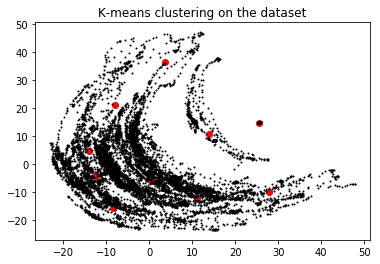

In [42]:
#K-Means clustering with PCA-transformed 2 components of images
#11 cluster for the digits 0-10 inclusive
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(project)

yhat = clusters.labels_
mse, accuracy, rsq = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

# Plot the cluster centers and PCA transformed data
plt.plot(project[:,0], project[:,1],'k.', markersize=2)
centers = clusters.cluster_centers_
print(centers)
print("Clustered Labels",clusters.labels_)
print("True Labels", y)
plt.scatter(centers[:, 0], centers[:, 1], color='red')
plt.title('K-means clustering on the dataset')

In [43]:
#K-Means clustering with PCA-transformed 82 components of images
project_82 = PCA(n_components=82).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_82)

yhat = c.labels_
mse, accuracy,rsq = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

Confusion matrix
 [[ 112  145    0   11   66  464   25   45  113    0   19]
 [  40  303    0    0   49  433   84   15   50    0   26]
 [  64  307   60    8  266  102   36   45   92    0   20]
 [  34    0  205   74  257    0   21   40  360    4    5]
 [  51    0  262  431   75    0   33   49   68   31    0]
 [  12   83  154   61  411    0  130   47   67    0   35]
 [   0  281   78   43  431   90   31   29   17    0    0]
 [   0    0  520  100   58    0  255   65    2    0    0]
 [   0  168   17   38  620    5  129    0   23    0    0]
 [   0    0  400   86  169    0   74   54   87    0  130]
 [   0    0    0    0    0    0    0    0    0 1000    0]]
MSE 13.183181818181819
Accuracy 0.06754545454545455
R^2 -0.3183181818181817


In [44]:
#K-Means clustering with PCA-transformed 200 components of images
project_200 = PCA(n_components=200).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_200)

yhat = c.labels_
mse, accuracy,rsq = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)

Confusion matrix
 [[ 472  124   21   12  141  147   24    0   25   25    9]
 [ 433   50   67    0  272   57   23    0    0   44   54]
 [  83  223   45    7  277   71   63    0   14   25  192]
 [   0  482  168   86    2   49   43    4    0   10  156]
 [   0   95   42  400   83   55  154   32   36   14   89]
 [   0  128  107   51   94   14   84    0    2   97  423]
 [   9  203   57   39  259    0   25    0   20    0  388]
 [   0   43  313   97  237    0  186    0   35    8   81]
 [   2  392  135   39  166    0    0    0    0    0  266]
 [   0  121  250   72   43    0  121    0   42  154  197]
 [   0    0    0    0    0    0    0 1000    0    0    0]]
MSE 14.936363636363636
Accuracy 0.08445454545454545
R^2 -0.49363636363636365


# Logistic Regression - Lasso Regularization

In [35]:
# One vs Rest

X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x_cnn, y,test_size=0.4, shuffle = True)

acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', solver='saga',multi_class='ovr')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))

    
    c_logreg.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy on training data = 0.092879
Accuracy on test data = 0.087955
-0.9193981122357315
Accuracy on training data = 0.149545
Accuracy on test data = 0.152955
0.11826007463377708


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.844091
Accuracy on test data = 0.835227
0.8121488745087867


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.985758
Accuracy on test data = 0.962727
0.9563949661280732


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.998636
Accuracy on test data = 0.974773
0.9705568943630625


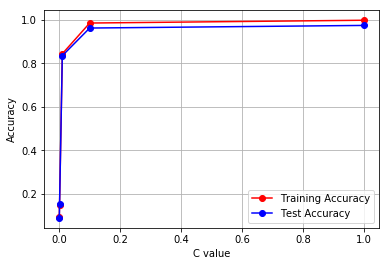

In [36]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'ro-')
plt.plot(c_logreg, acc_test_logreg,'bo-')
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [37]:
# x_scale = preprocessing.scale(X)
# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.4, shuffle = True)

acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', solver='saga',multi_class='multinomial')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))

    c_logreg.append(c)

Accuracy on training data = 0.093030
Accuracy on test data = 0.087727
-1.5883893286008406
Accuracy on training data = 0.170909
Accuracy on test data = 0.172045
-0.0859457937868755


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.854697
Accuracy on test data = 0.837045
0.810846890783957


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.993788
Accuracy on test data = 0.978182
0.9835082061521576


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.999848
Accuracy on test data = 0.994091
0.9951803760361568


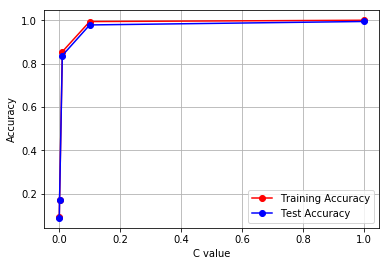

In [38]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'ro-')
plt.plot(c_logreg, acc_test_logreg,'bo-')
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistical Regression - Ridge Regression

In [18]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    
    logreg2 = linear_model.LogisticRegression(C=c, solver='saga',multi_class='ovr')
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))

    
    c_logreg2.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.789091
Accuracy on test data = 0.779318
0.7195145299811856


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.938030
Accuracy on test data = 0.925455
0.914991925080343


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.988939
Accuracy on test data = 0.970909
0.9583881355546674


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.997273
Accuracy on test data = 0.980455
0.9733491907208287


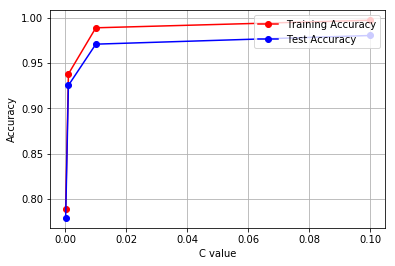

In [19]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [20]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    
    logreg2 = linear_model.LogisticRegression(C=c, solver='saga',multi_class='multinomial')
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))

    
    c_logreg2.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.817273
Accuracy on test data = 0.810000
0.7466914925765981


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.965758
Accuracy on test data = 0.951364
0.9370446119001894


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.996818
Accuracy on test data = 0.987955
0.9891337902080632
Accuracy on training data = 1.000000
Accuracy on test data = 0.996364
0.9961110407060437


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


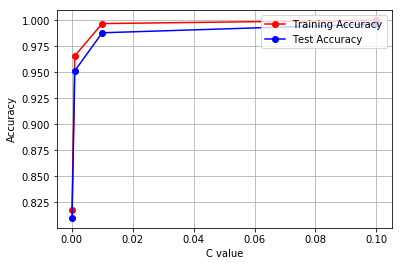

In [21]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistical Regression - Polynomial Feature Transformation

In [22]:
poly = PolynomialFeatures(degree=2)

# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit(X_train)
X_transformed_test = poly.fit(X_test)

In [23]:
# Not enough memory
X_transformed_train = poly.transform(X_train)
X_transformed_test = poly.transform(X_test)

MemoryError: 

# Support Vector Machine - Linear Kernal

In [33]:
acc_train_svm= []
acc_test_svm = []
c_svm = []

X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_cnn, y,test_size=0.4, shuffle = True)


def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.LinearSVC(C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    print(r2_score(Y_test, Yhat_svc_linear_test))

    
    c_svm.append(c)   

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train Accuracy = 0.645000
Test Accuracy = 0.639545
0.4733476170415746
Train Accuracy = 0.801212
Test Accuracy = 0.790000
0.7355954491063477
Train Accuracy = 0.921667
Test Accuracy = 0.895909
0.870550982632594
Train Accuracy = 0.977273
Test Accuracy = 0.957045
0.9377993112224322
Train Accuracy = 0.999848
Test Accuracy = 0.981364
0.9771938455754694


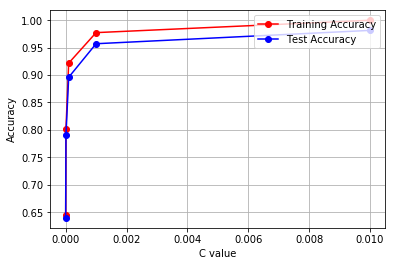

In [25]:
# cVals = [0.000001, 0.00001, 0.0001, 0.001]
cVals = [0.000001, 0.00001, 0.0001,0.001, 0.01]

for c in cVals:
    svm_linear(c)

plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Radial Basis Function Kernal

In [26]:
acc_train_svm = []
acc_test_svm = []
c_svm= []
# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.4, shuffle = True)

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_RBF(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(kernel = 'rbf', C = c, gamma = 'scale')
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    print(r2_score(Y_test, Yhat_svc_linear_test))
    
    c_svm.append(c)

Accuracy = 0.182121
Accuracy = 0.170000
-0.7471716895653959
Accuracy = 0.538636
Accuracy = 0.534773
0.1683325094764745
Accuracy = 0.949545
Accuracy = 0.938182
0.9313979861877802
Accuracy = 0.999848
Accuracy = 0.999318
0.999403460749459
Accuracy = 1.000000
Accuracy = 0.999773
0.999632898922744


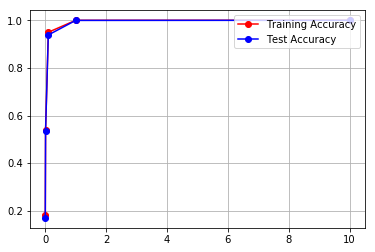

In [27]:
cVals = [0.001, 0.01, 0.1, 1, 10]

for c in cVals:
    svm_RBF(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Polynomial Kernal

In [28]:
acc_train_svm = []
acc_test_svm = []
c_svm= []
# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.4, shuffle = True)

def svm_polynomial(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_polynomial = svm.SVC(kernel = 'poly', C = c, gamma = 'scale')
    
    A = X_train[0:1100,:]  # First 300 rows of training set.
    B = Y_train[0:1100]  
    C = X_test[0:1100,:]   # First 100 rows of test set.
    D = Y_test[0:1100]
    
    # Fit the classifier on the training set.
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    print("r2 = {0:f}".format(r2_score(D, Yhat_svc_polynomial_test)))

    c_svm.append(c)

Accuracy = 0.100000
Accuracy = 0.077273
r2 = -1.615519
Accuracy = 0.100000
Accuracy = 0.077273
r2 = -1.615519
Accuracy = 0.100000
Accuracy = 0.077273
r2 = -1.615519
Accuracy = 0.149091
Accuracy = 0.110909
r2 = -1.561425
Accuracy = 0.467273
Accuracy = 0.390909
r2 = -0.010334
Accuracy = 0.890909
Accuracy = 0.803636
r2 = 0.788375
Accuracy = 0.993636
Accuracy = 0.942727
r2 = 0.947368


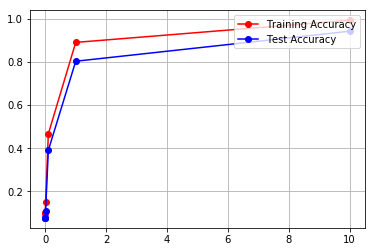

In [34]:
cVals = [0.00001,0.0001, 0.001, 0.01, 0.1,1,10]

for c in cVals:
    svm_polynomial(c)

    
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Convolutional Neural Network

### Preprocessing of data

In [45]:
#Reinitialize data
#Scaling the features to help the algorithm converge, we will scale the data to have a mean of 0 and unit variance
#Run with original X data once
X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)

#Split the data into training and test set.  60% training and 40% test, shuffle data
X_train, X_test, y_train, y_test = train_test_split(x_cnn, y, test_size=0.4,shuffle=True)
x_train = X_train.reshape(X_train.shape[0],30,30,1)
x_test = X_test.reshape(X_test.shape[0],30,30,1)

#Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, 11)
y_test = keras.utils.to_categorical(y_test, 11)

print(x_train.shape)
print(y_train.shape)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6600, 30, 30, 1)
(6600, 11)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 18s 3ms/step - loss: 0.6439 - acc: 0.8091 - val_loss: 0.0464 - val_acc: 0.9939
Epoch 2/10
6600/6600 [==============================] - 13s 2ms/step - loss: 0.0145 - acc: 0.9988 - val_loss: 0.0064 - val_acc: 0.9995
Epoch 3/10
6600/6600 [==============================] - 11s 2ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 11s 2ms/step - loss: 6.3792e-04 - acc: 1.0000 - val_loss: 6.7415e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 12s 2ms/step - loss: 4.2642e-04 - acc: 1.0000 - val_loss: 5.4793e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 13s 2ms/step - loss: 3.1902e-04 - acc: 1.0000 - val_loss: 3.9162e-04 - val_acc: 1.000

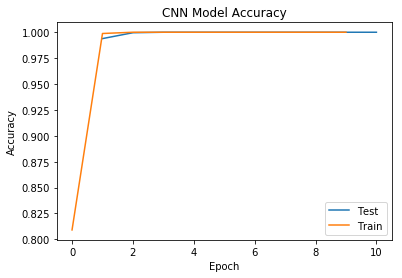

rsq = 0.999998


In [46]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Learning Rate (increased from 0.001 to 0.01)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 11s 2ms/step - loss: 14.4932 - acc: 0.0873 - val_loss: 14.5979 - val_acc: 0.0943
Epoch 2/10
6600/6600 [==============================] - 11s 2ms/step - loss: 14.6894 - acc: 0.0886 - val_loss: 14.5979 - val_acc: 0.0943
Epoch 3/10
6600/6600 [==============================] - 10s 1ms/step - loss: 14.6894 - acc: 0.0886 - val_loss: 14.5979 - val_acc: 0.0943
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 14.6894 - acc: 0.0886 - val_loss: 14.5979 - val_acc: 0.0943
Epoch 5/10
6600/6600 [==============================] - 9s 1ms/step - loss: 14.6894 - acc: 0.0886 - val_loss: 14.5979 - val_acc: 0.0943
Epoch 6/10
6600/6600 [==============================] - 9s 1ms/step - loss: 14.6894 - acc: 0.0886 - val_loss: 14.5979 - val_acc: 0.0943
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 14.6894 - acc: 0.0886 - val_loss: 14.5979 - val_acc: 0.09

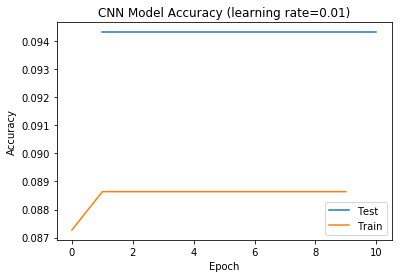

rsq = -0.992500


In [47]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.01
learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (learning rate=0.01)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Learning Rate (decreased from 0.001 to 0.0001)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 9s 1ms/step - loss: 1.6810 - acc: 0.5515 - val_loss: 1.0357 - val_acc: 0.7357
Epoch 2/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.6933 - acc: 0.8359 - val_loss: 0.4346 - val_acc: 0.9114
Epoch 3/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.3106 - acc: 0.9435 - val_loss: 0.2102 - val_acc: 0.9650
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.1597 - acc: 0.9741 - val_loss: 0.1137 - val_acc: 0.9861
Epoch 5/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0879 - acc: 0.9886 - val_loss: 0.0709 - val_acc: 0.9920
Epoch 6/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0537 - acc: 0.9950 - val_loss: 0.0472 - val_acc: 0.9968
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0355 - acc: 0.9979 - val_loss: 0.0307 - val_acc: 0.9970
Epoch 8/10
660

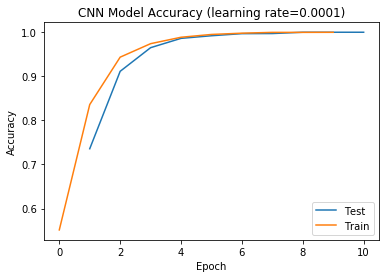

rsq = 0.998737


In [48]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.0001
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (learning rate=0.0001)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Layers (Removed a Convolution and Pooling Layer)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 13s 2ms/step - loss: 0.5234 - acc: 0.8529 - val_loss: 0.1002 - val_acc: 0.9759
Epoch 2/10
6600/6600 [==============================] - 14s 2ms/step - loss: 0.0294 - acc: 0.9945 - val_loss: 0.0109 - val_acc: 0.9982
Epoch 3/10
6600/6600 [==============================] - 14s 2ms/step - loss: 0.0053 - acc: 0.9992 - val_loss: 0.0070 - val_acc: 0.9984
Epoch 4/10
6600/6600 [==============================] - 16s 2ms/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0034 - val_acc: 0.9995
Epoch 5/10
6600/6600 [==============================] - 16s 2ms/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0020 - val_acc: 0.9998
Epoch 6/10
6600/6600 [==============================] - 14s 2ms/step - loss: 5.8946e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 0.9998
Epoch 7/10
6600/6600 [==============================] - 14s 2ms/step - loss: 4.3753e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 0.9995

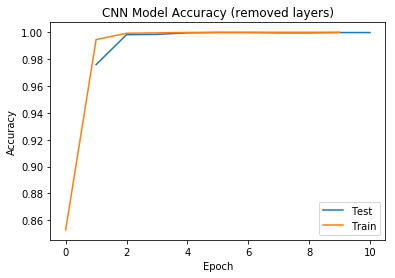

rsq = 0.999666


In [49]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, removed a convolution and pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (removed layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Activation Function (sigmoid)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 11s 2ms/step - loss: 2.4176 - acc: 0.1209 - val_loss: 2.0863 - val_acc: 0.3123
Epoch 2/10
6600/6600 [==============================] - 9s 1ms/step - loss: 1.4533 - acc: 0.5386 - val_loss: 0.8812 - val_acc: 0.7175
Epoch 3/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.6001 - acc: 0.8214 - val_loss: 0.4185 - val_acc: 0.8873
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.3354 - acc: 0.9226 - val_loss: 0.2771 - val_acc: 0.9334
Epoch 5/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.2209 - acc: 0.9541 - val_loss: 0.1975 - val_acc: 0.9595
Epoch 6/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.1594 - acc: 0.9670 - val_loss: 0.1233 - val_acc: 0.9757
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.1117 - acc: 0.9795 - val_loss: 0.0975 - val_acc: 0.9857
Epoch 8/10
66

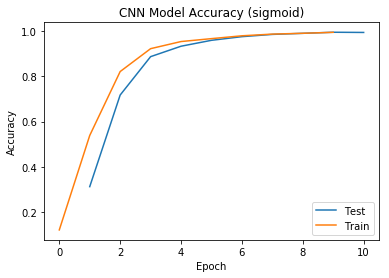

rsq = 0.984055


In [50]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Used sigmoid activation function
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='sigmoid',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (sigmoid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Activation Function (tanh)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.5082 - acc: 0.8494 - val_loss: 0.0588 - val_acc: 0.9857
Epoch 2/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0234 - acc: 0.9962 - val_loss: 0.0205 - val_acc: 0.9930
Epoch 3/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0048 - acc: 0.9995 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 9s 1ms/step - loss: 7.5182e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 5.9161e-04 - acc: 1.0000 - val_loss: 8.7741e-04 - val_acc: 1.0000
Ep

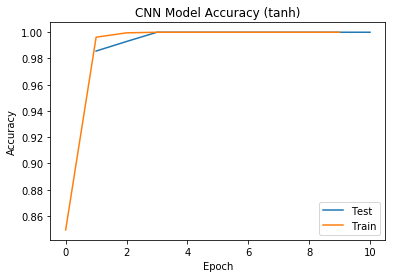

rsq = 0.999982


In [51]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Used tanh activation function
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='tanh'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (tanh)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Batch Normalization Regularization

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 24s 4ms/step - loss: 0.2082 - acc: 0.9403 - val_loss: 0.0052 - val_acc: 0.9995
Epoch 2/10
6600/6600 [==============================] - 23s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 23s 3ms/step - loss: 7.7770e-04 - acc: 1.0000 - val_loss: 5.9482e-04 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 23s 3ms/step - loss: 4.3578e-04 - acc: 1.0000 - val_loss: 4.2913e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 23s 3ms/step - loss: 3.0185e-04 - acc: 1.0000 - val_loss: 3.4241e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 23s 3ms/step - loss: 2.4795e-04 - acc: 1.0000 - val_loss: 2.9075e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 23s 3ms/step - loss: 2.3292e-04 - acc: 1.0000 - val_lo

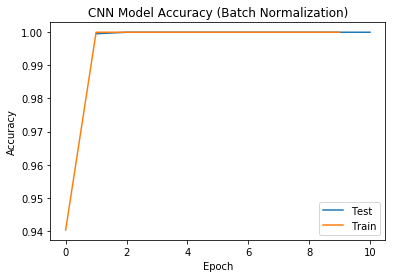

rsq = 0.999998


In [52]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add Batch normalization
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (Batch Normalization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### LASSO (L1) Regression Regularization

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="softmax", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 1ms/step - loss: 2.9940 - acc: 0.8052 - val_loss: 1.3404 - val_acc: 0.9466
Epoch 2/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.7554 - acc: 0.9876 - val_loss: 0.4466 - val_acc: 0.9968
Epoch 3/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.3357 - acc: 0.9976 - val_loss: 0.2686 - val_acc: 0.9957
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.2139 - acc: 0.9977 - val_loss: 0.1753 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.1444 - acc: 0.9997 - val_loss: 0.1251 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.1067 - acc: 1.0000 - val_loss: 0.0943 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.1017 - acc: 0.9968 - val_loss: 0.1219 - val_acc: 0.9986
Epoch 8/10

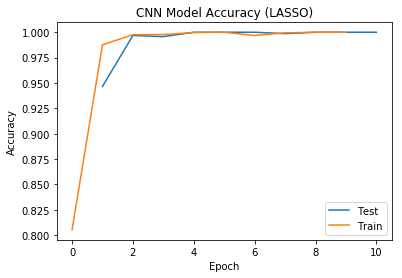

rsq = 0.999748


In [53]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add L1 Regularization in last dense layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, W_regularizer=keras.regularizers.l1(0.01), activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (LASSO)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))

### Ridge (L2) Regression Regularization

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="softmax", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.7792 - acc: 0.8144 - val_loss: 0.1963 - val_acc: 0.9877
Epoch 2/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.1429 - acc: 0.9983 - val_loss: 0.1130 - val_acc: 0.9998
Epoch 3/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.0955 - acc: 1.0000 - val_loss: 0.0832 - val_acc: 0.9986
Epoch 4/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.0701 - acc: 1.0000 - val_loss: 0.0599 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0517 - acc: 1.0000 - val_loss: 0.0445 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.0435 - acc: 0.9986 - val_loss: 0.0764 - val_acc: 0.9857
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0743 - acc: 0.9914 - val_loss: 0.0355 - val_acc: 1.0000
Epoch 8/1

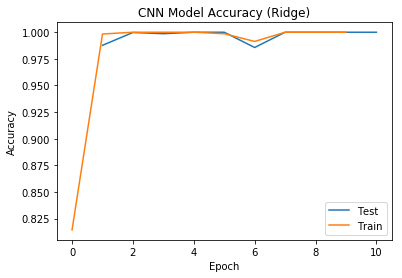

rsq = 0.999965


In [54]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add L2 Regularization in last dense layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, W_regularizer=keras.regularizers.l2(0.01), activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (Ridge)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))